Introduce el correo del cliente:  juan@mail.com


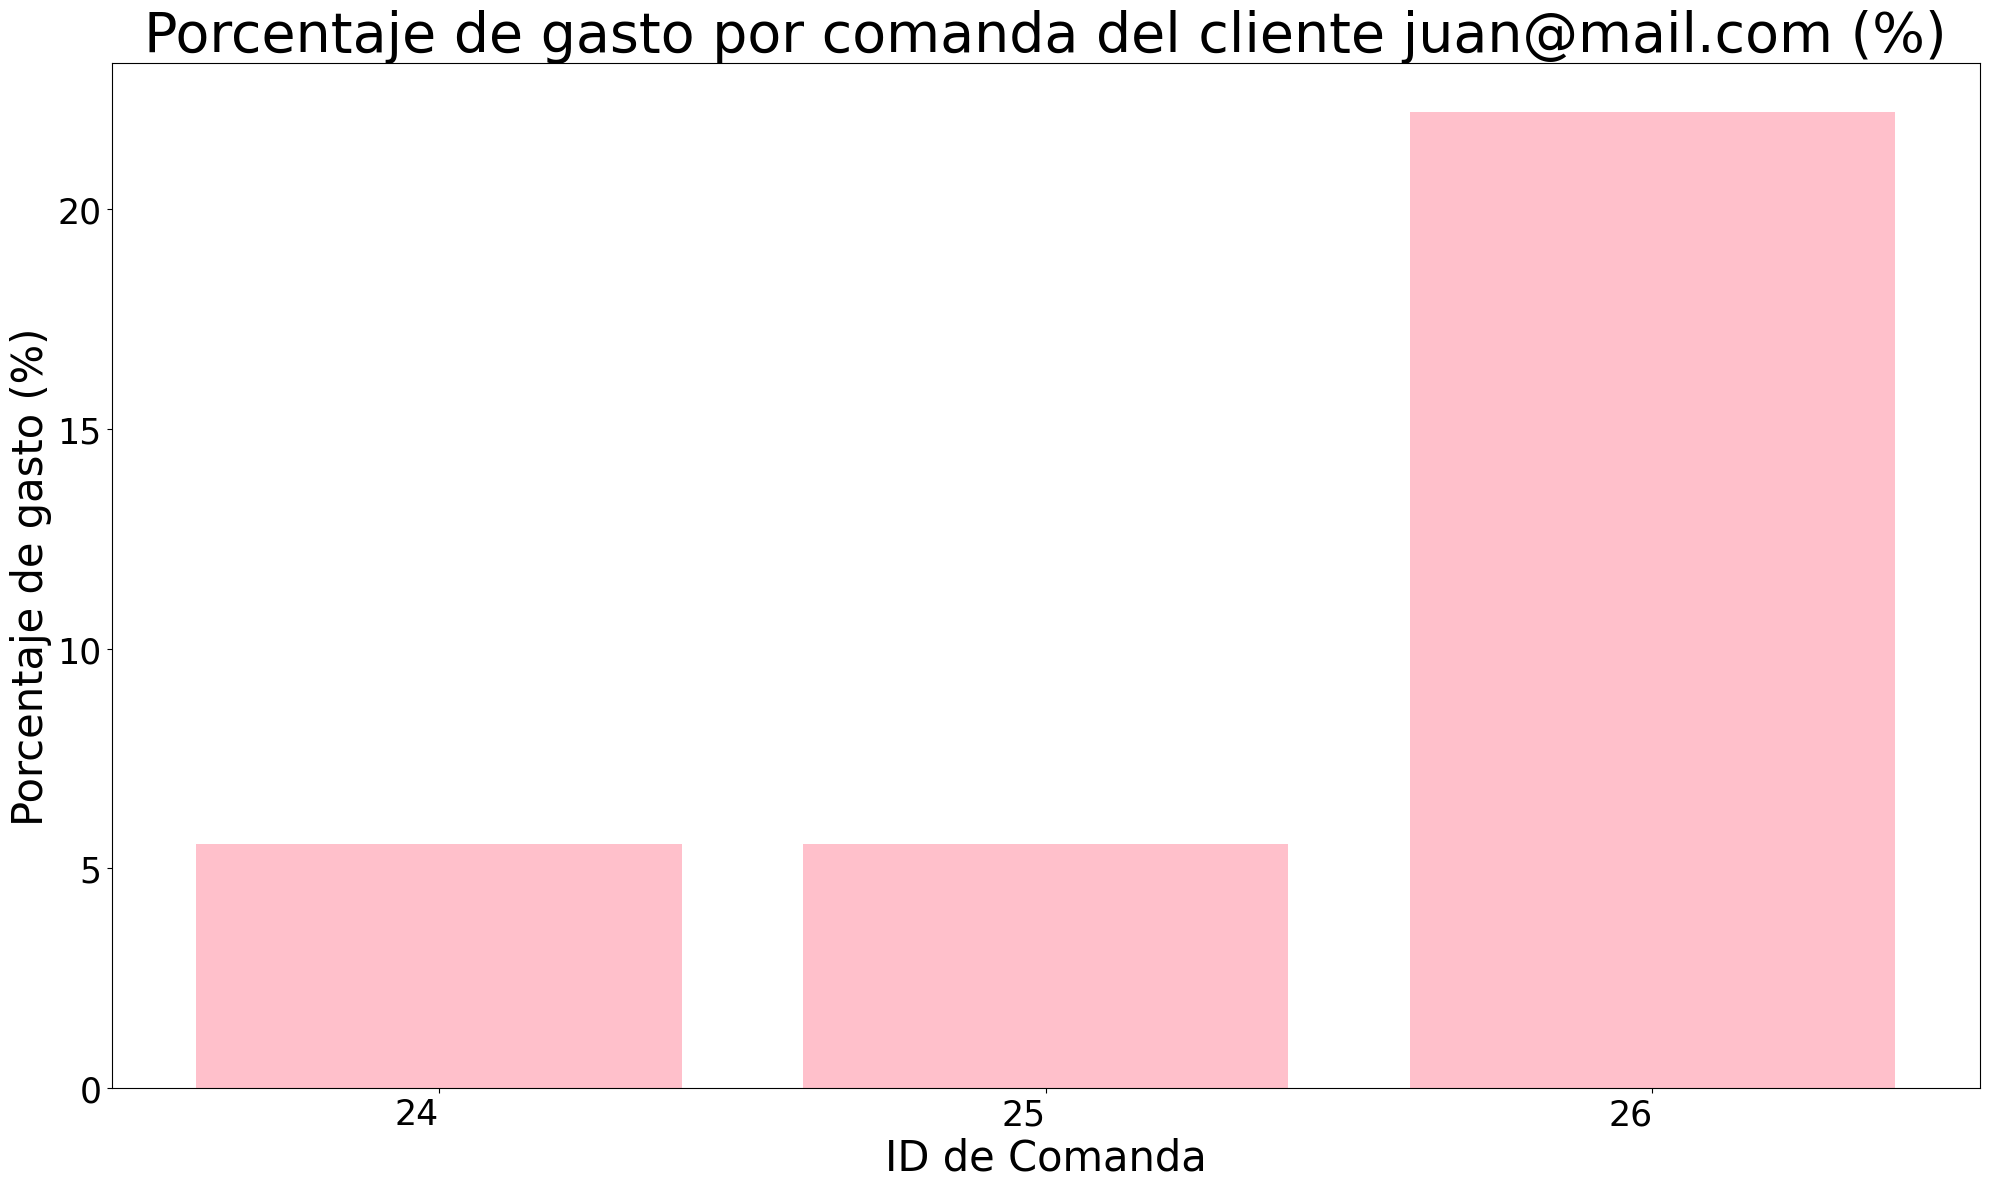

In [2]:
import mysql.connector
import matplotlib.pyplot as plt
import numpy as np

connection = mysql.connector.connect(
    host="localhost",
    port="3306",
    user="root",
    password="",
    database="tr1-g4-wired"
)
cursor = connection.cursor()

cliente_correo = input("Introduce el correo del cliente: ")

select = """
SELECT 
    c.ID,
    u.CORREO,
    c.PREU_TOTAL
FROM 
    comanda c
JOIN 
    usuari u ON c.IDUSER = u.ID
WHERE 
    u.CORREO = %s
"""

cursor.execute(select, (cliente_correo,))
datos_estadistiques = cursor.fetchall()

cursor.execute("SELECT SUM(PREU_TOTAL) FROM comanda")
total_gasto_todos = cursor.fetchone()[0]

connection.close()

precios_totales = [row[2] for row in datos_estadistiques]
    
porcentajes = (np.array(precios_totales) * 100) / total_gasto_todos

etiquetas = [f"{row[0]}" for row in datos_estadistiques]

plt.figure(figsize=(20, 12))
plt.bar(etiquetas, porcentajes, color='pink')
plt.title(f'Porcentaje de gasto por comanda del cliente {cliente_correo} (%)', size=40)
plt.xlabel('ID de Comanda', size=30)
plt.ylabel('Porcentaje de gasto (%)', size=30)
plt.xticks(ha='right', size=25)
plt.yticks(size=25)
plt.tight_layout()
plt.show()
